<b style="font-size:28pt">에어비엔비 가격 예측</b>

(시나리오)
목표:

# 01. 데이터 로드 (Airbnb NY)

'AB_NYC_2019.csv' 파일은 2019년 에어비엔비에 등록된 뉴욕시 지역 숙소에 대한 정보와 가격을 기록한 데이터입니다. 숙소에 대한 정보를 바탕으로 숙박 가격을 예측하는 머신러닝 모델을 만들고자 합니다. 데이터셋의 컬럼은 다음과 같습니다:

* IV (1개)
    * price: 1박 숙박료 ($)
    
* DV (15개)
    * id: 숙소 ID
    * name: 숙소명
    * host_id: 호스트 ID
    * host_name: 호스트명
    * neighbourhood_group: 지역
    * latitude: 위도
    * longitude: 경도
    * room_type: 룸 타입
    * minimum_nights: 최저 숙박 일수
    * number_of_reviews: 리뷰수
    * last_review: 마지막 리뷰일
    * reviews_per_month: 한달 평균 리뷰수
    * calculated_host_listings_count: 이 호스트의 총 숙소 개수
    * availability_365: 숙박 가능 일수

<b>CSV 파일 불러오기</b>

In [2]:
import numpy as np
import pandas as pd

# Load data

df = pd.read_csv('AB_NYC_2019_subset2000.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,21082203,Sunny Private Bedroom in Washington Heights,75126216,Michael,Manhattan,Washington Heights,40.83784,-73.94081,Private room,75,3,2,22/10/2017,0.09,1,0
1,32122886,Private Room New York 3 (4f),102466916,Luca And Kameko,Manhattan,Harlem,40.80577,-73.94480,Private room,55,60,0,NaN,NaN,6,210
2,28312266,"Suite 18 - Mini Apartment, ALL YOURS!",99296570,Daisy,Brooklyn,Brighton Beach,40.57973,-73.95799,Private room,65,1,23,25/06/2019,2.34,5,204
3,14195677,Cute/Private 1 Bedroom Apt in Queens,61925777,Charis,Queens,Maspeth,40.71628,-73.90093,Entire home/apt,75,2,5,03/06/2018,0.14,1,0
4,13078166,West 15th Street Cozy Chelsea Studio Serviced Apt,22541573,Ken,Manhattan,Chelsea,40.73929,-73.99990,Entire home/apt,179,30,0,NaN,NaN,87,273


# 02. 데이터 탐색 EDA & 데이터 전처리

- 데이터셋 전체적으로 탐색하기: 크기, 데이터 타입
- 변수 별로 탐색하기 (종속변수, 독립변수)
- 변수 간 관계 파악하기 
- 데이터 클린징 및 불필요한 변수 제거
- 결측치 처리
- 레이블 인코딩 & 원-핫 인코딩
- 이상치 제거

## 데이터 오버뷰

<b>데이터셋 크기 확인</b>

In [3]:
df.shape

(2000, 16)

<b>컬럼 데이터 타입과 결측치 포함된 행 확인</b>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              2000 non-null   int64  
 1   name                            2000 non-null   object 
 2   host_id                         2000 non-null   int64  
 3   host_name                       2000 non-null   object 
 4   neighbourhood_group             2000 non-null   object 
 5   neighbourhood                   2000 non-null   object 
 6   latitude                        2000 non-null   float64
 7   longitude                       2000 non-null   float64
 8   room_type                       2000 non-null   object 
 9   price                           2000 non-null   int64  
 10  minimum_nights                  2000 non-null   int64  
 11  number_of_reviews               2000 non-null   int64  
 12  last_review                     15

<b>컬럼별 기술통계 확인</b>

In [5]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.000000e+03,2.000000e+03,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,1590.000000,2000.000000,2000.000000
mean,1.872279e+07,6.774036e+07,40.729613,-73.951885,146.42500,7.327000,23.661500,1.408994,6.469500,102.498000
std,1.087383e+07,7.883752e+07,0.055314,0.047151,198.93948,32.987773,44.728752,1.686425,31.038037,127.375595
min,9.783000e+03,2.868000e+03,40.548780,-74.166340,10.00000,1.000000,0.000000,0.020000,1.000000,0.000000
25%,9.044983e+06,7.958704e+06,40.690480,-73.983142,65.00000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.938312e+07,2.972785e+07,40.723865,-73.956295,100.00000,2.000000,5.000000,0.680000,1.000000,31.000000
75%,2.851413e+07,1.074344e+08,40.763990,-73.936285,175.00000,5.000000,24.000000,2.237500,2.000000,197.250000
max,3.648278e+07,2.743076e+08,40.913060,-73.718290,6000.00000,1250.000000,417.000000,14.360000,327.000000,365.000000


<b>불필요한 변수 제거 (1차)</b>

In [6]:
df_model = df.drop(columns = ['name', 'host_name', 'last_review'])
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              2000 non-null   int64  
 1   host_id                         2000 non-null   int64  
 2   neighbourhood_group             2000 non-null   object 
 3   neighbourhood                   2000 non-null   object 
 4   latitude                        2000 non-null   float64
 5   longitude                       2000 non-null   float64
 6   room_type                       2000 non-null   object 
 7   price                           2000 non-null   int64  
 8   minimum_nights                  2000 non-null   int64  
 9   number_of_reviews               2000 non-null   int64  
 10  reviews_per_month               1590 non-null   float64
 11  calculated_host_listings_count  2000 non-null   int64  
 12  availability_365                20

## 결측치 처리

<b>결측치 있는 컬럼 확인</b>

In [7]:
na_total = df_model.isnull().sum().sort_values(ascending=False)
na_percent = (df_model.isnull().sum())/df_model.isnull().count().sort_values(ascending=False)
missing_data = pd.concat([na_total, na_percent], axis=1, keys=['Total','Percent'], sort=False).sort_values('Total', ascending=False)
missing_data

,Total,Percent
reviews_per_month,410,0.205
availability_365,0,0.000
calculated_host_listings_count,0,0.000
number_of_reviews,0,0.000
minimum_nights,0,0.000
price,0,0.000
room_type,0,0.000
longitude,0,0.000
latitude,0,0.000
neighbourhood,0,0.000


<b>결측치 처리</b>

In [8]:
# 결측치 평균으로 대체
df_model['reviews_per_month'].fillna(df_model['reviews_per_month'].mean(), inplace = True)
df_model.isnull().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

## 변수 별 데이터 탐색

### 종속변수 (Price)

가격 빈도 분포가 심하게 비대칭이기 때문에 log변환 필요.
다음 방법 중 택 1
* 방법 1: np.log1p ---> 해당 컬럼만 로그변환
* 방법 2: PowerTransformer ----> 정규분포에 근사하도록 알고리즘이 자동변환 (사용할 시 표준화까지 되기 때문에 뒤에 scaling 과정 생략해야함)

<b>방법 1: np.log1p</b>

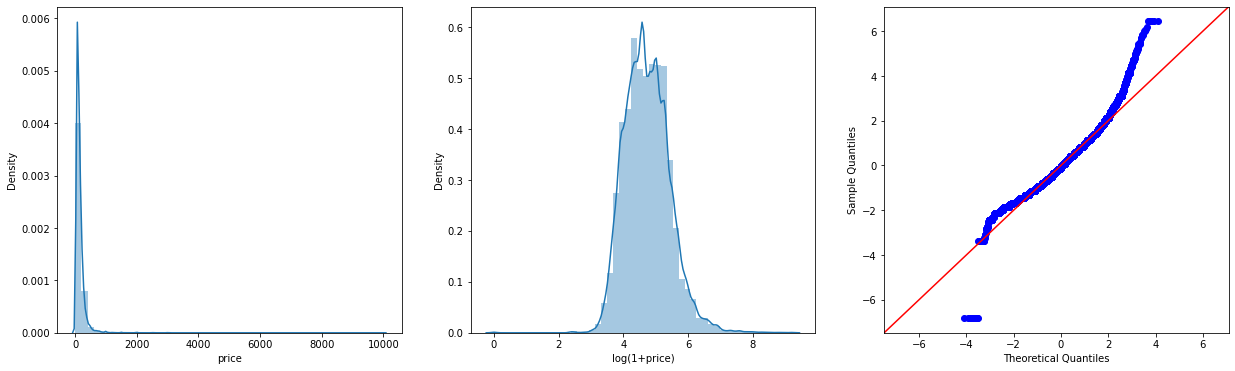

In [11]:
## 방법 1: Price LOG 변환

# import scipy.stats as stats
# import statsmodels.api as sm
# import matplotlib.pyplot as plt
# import seaborn as sns
# import warnings
# warnings.filterwarnings(action='ignore')

# log_price = np.log1p(df_model['price'])

# fig, axes = plt.subplots(1,3, figsize=(21,6))
# sns.distplot(df_model['price'], ax=axes[0])
# sns.distplot(log_price, ax=axes[1])
# axes[1].set_xlabel('log(1+price)')
# sm.qqplot(log_price, stats.norm, fit=True, line='45', ax=axes[2]);

# # log price 컬럼 추가
# df_model['price_log'] = log_price

<b>방법 2: Power Transformer</b>

* 아래 함수를 price 포함 모든 numerical 변수에 적용하였다.
* 자동으로 표준화까지 해주기 때문에 Power Transformer 쓸 경우 아래 표준화(scaling) 과정을 건너뛰어야 한다.

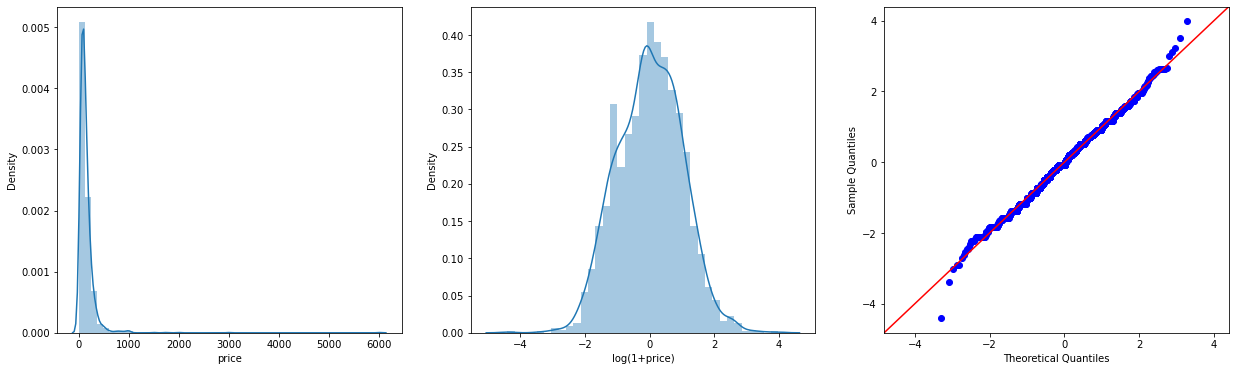

In [9]:
# # Power Transformer

from sklearn.preprocessing import PowerTransformer
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings(action='ignore')

numerical_cols = ['price', 'latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

pt = PowerTransformer()
df_model.loc[:, numerical_cols] = pt.fit_transform(df_model.loc[:, numerical_cols])
df_model

log_price = df_model['price']

fig, axes = plt.subplots(1,3, figsize=(21,6))
sns.distplot(df['price'], ax=axes[0])
sns.distplot(log_price, ax=axes[1])
axes[1].set_xlabel('log(1+price)')
sm.qqplot(log_price, stats.norm, fit=True, line='45', ax=axes[2]);

count    2.000000e+03
mean     2.619016e-16
std      1.000250e+00
min     -4.401548e+00
25%     -7.397810e-01
50%     -6.558017e-02
75%      7.231974e-01
max      3.977935e+00
Name: price, dtype: float64

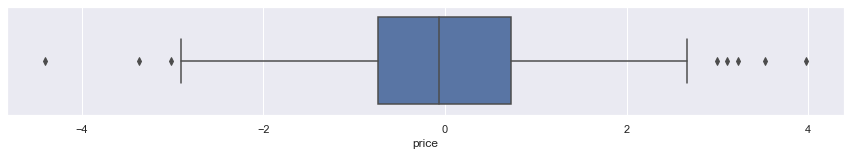

In [10]:
plt.figure(figsize = (15, 2))
sns.set_theme(style="darkgrid")
sns.boxplot(df_model['price'])

df_model['price'].describe()

### 독립변수

<b>Id, Host_id</b>

- 총 37457명의 호스트가 48895 숙소를 렌팅하고 있음을 알 수 있다.

In [11]:
print(df['id'].unique().size, df['host_id'].unique().size)

2000 1914


<b>Neighborhood_group</b>

* 총 5개 neighboorhood group 이 있다.
* Brooklyn과 Manhattan 지역에 숙소가 가장 많은 것을 알 수 있다 (상업지구).
* Manhattan 지역의 평균 숙박값이 가장 높은 것을 알 수 있다.

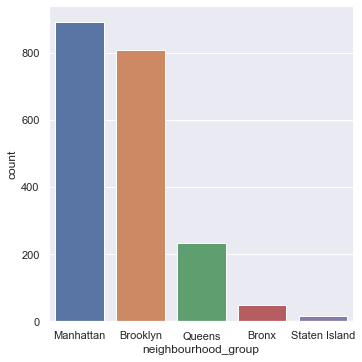

In [13]:
# Neighborhood_group별 숙소수
sns.set_theme()
sns.catplot(x='neighbourhood_group', kind='count' ,data=df)

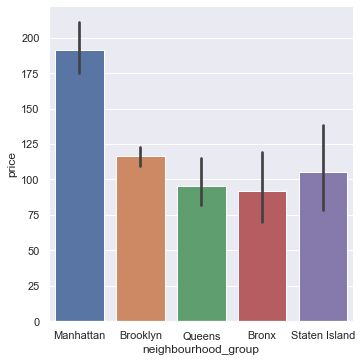

In [15]:
# Neighborhood_group 별 가격
sns.catplot(x='neighbourhood_group', y='price', kind='bar' ,data=df)

<b>Neighbourhood</b>

* Neighbourhood group 내 총 221개 neighbourhood가 있다.

154


<AxesSubplot:>

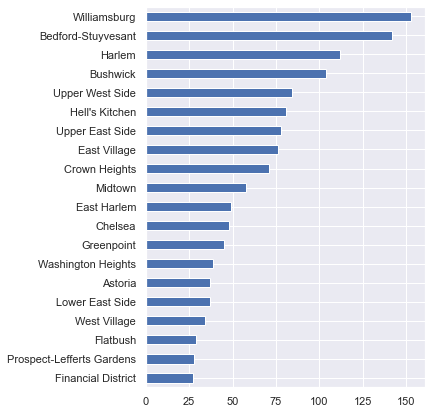

In [16]:
# Neighborhood별 숙소수 (상위 20개)
print(df['neighbourhood'].unique().size)
df['neighbourhood'].value_counts()[:20].sort_values(ascending=True).plot(kind='barh', figsize = (5, 7))

In [138]:
# Neighborhood별 가격

<b>Longitude and latitude</b>

* 위도와 경도는 서로 상관이 있음 -----> 다중공선성 Multi-collinearity 문제로 인해 하나 선택 필요할수도 있음 (VIF > 10 로 확인)
* 중심부에 위치한 숙소가 가격이 비교적 높은 것을 알 수 있다.

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

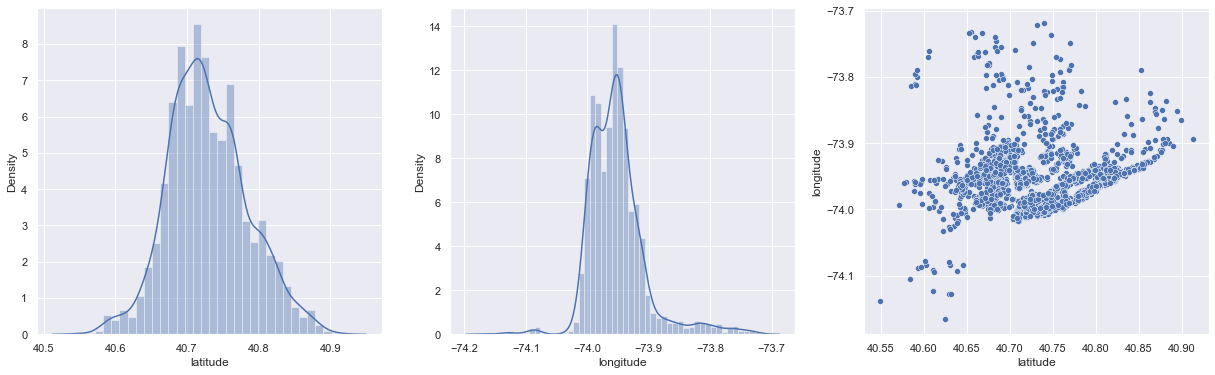

In [17]:
# 위도, 경도에 따른 숙소수
fig, axes = plt.subplots(1,3, figsize=(21,6))
sns.distplot(df['latitude'], ax=axes[0])
sns.distplot(df['longitude'], ax=axes[1])
sns.scatterplot(x= df['latitude'], y=df['longitude'])

<AxesSubplot:xlabel='longitude', ylabel='price'>

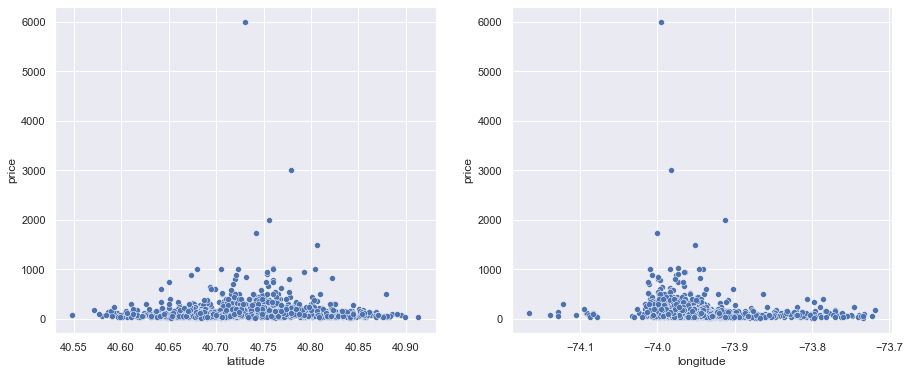

In [18]:
# 위도 & 가격
fig, axes = plt.subplots(1,2, figsize=(15,6))
sns.scatterplot(x= df['latitude'], y=df['price'], ax=axes[0])
sns.scatterplot(x= df['longitude'], y=df['price'], ax=axes[1])

<b>Room_type</b>

* 3가지 룸 타입이 있다: Private(개인실), Entire home/apt(공간 전체), Shared room(다인실)
* 공간 전체를 렌팅하는 경우 가격이 월등히 높고 다인실이 가격이 가장 저렴한 것을 알 수 있다.

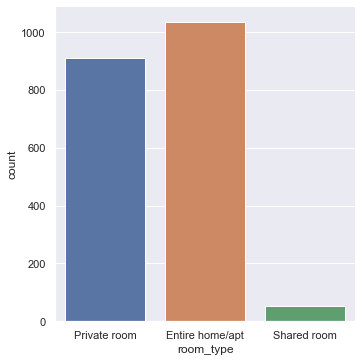

In [19]:
# 룸 타입별 숙소수, 룸 타입별 별 가격
sns.catplot(x = 'room_type', kind = 'count', data = df, ax=axes[0])

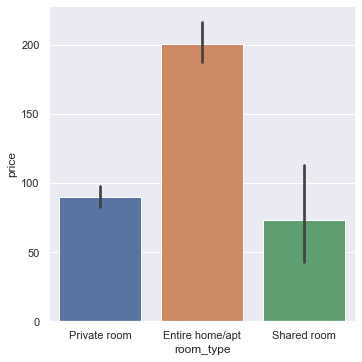

In [20]:
# 룸 타입별 별 가격
sns.catplot(x='room_type', y='price', kind='bar' ,data=df)

<b>Minimum_nights</b>

* PowerTransform 취한 후에도 정규분포화가 되지 않았음. -------> 해결 필요. Binning 시도? 혹은 그냥 제거
* 전체 데이터의 1/4가 '1박 이상'이고 가격과 최소 숙박일수의 상관이 낮은 것을 보아 변수의 중요도가 낮아 보인다.

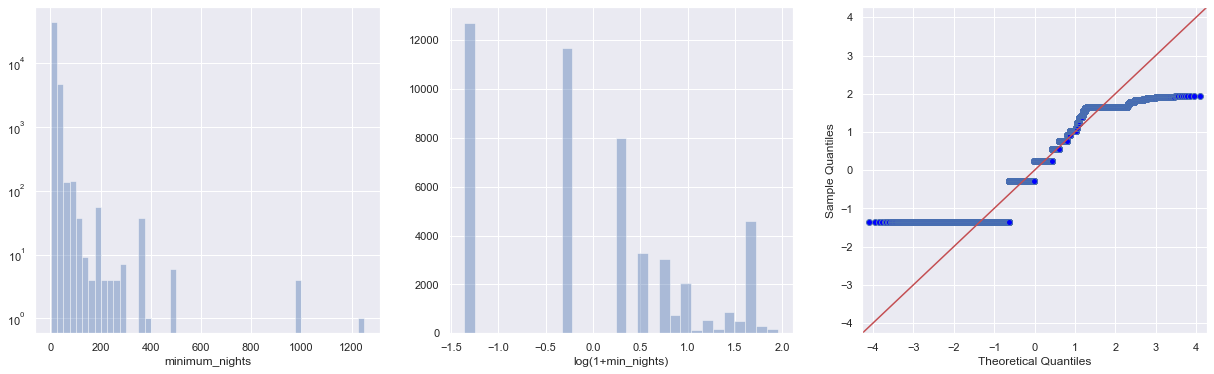

In [223]:
import matplotlib.pyplot as plt
import seaborn as sns

log_minimum_nights = df_model[df_model['minimum_nights']<800]['minimum_nights']

fig, axes = plt.subplots(1,3, figsize=(21,6))
sns.distplot(df['minimum_nights'], kde=False, ax=axes[0])
axes[0].set_yscale('log')
sns.distplot(log_minimum_nights, kde=False, ax=axes[1])
axes[1].set_xlabel('log(1+min_nights)')
sm.qqplot(log_minimum_nights, stats.norm, fit=True, line='45', ax=axes[2]);

In [279]:
df[df['minimum_nights']==1]['minimum_nights'].size

12720

<AxesSubplot:xlabel='minimum_nights'>

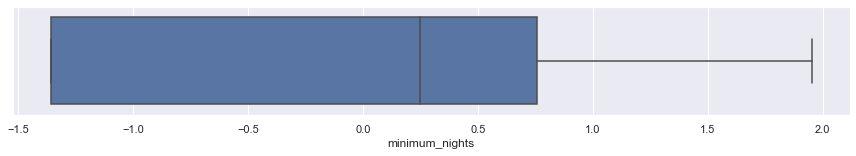

In [264]:
plt.figure(figsize = (15, 2))
sns.set_theme(style="darkgrid")
sns.boxplot(df_model['minimum_nights'])

                minimum_nights     price
minimum_nights        1.000000  0.042799
price                 0.042799  1.000000


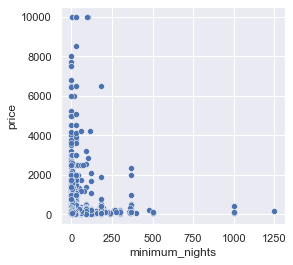

In [154]:
# 최소 숙박일 수 & 가격
plt.figure(figsize=(4,4))
sns.scatterplot(x= df['minimum_nights'], y=df['price'])

print(df[['minimum_nights', 'price']].corr())

<b>Number_of_reviews</b>
- PowerTransform 취한 후에도 정규분포화가 되지 않았음. -------> 해결 필요. Binning 시도?

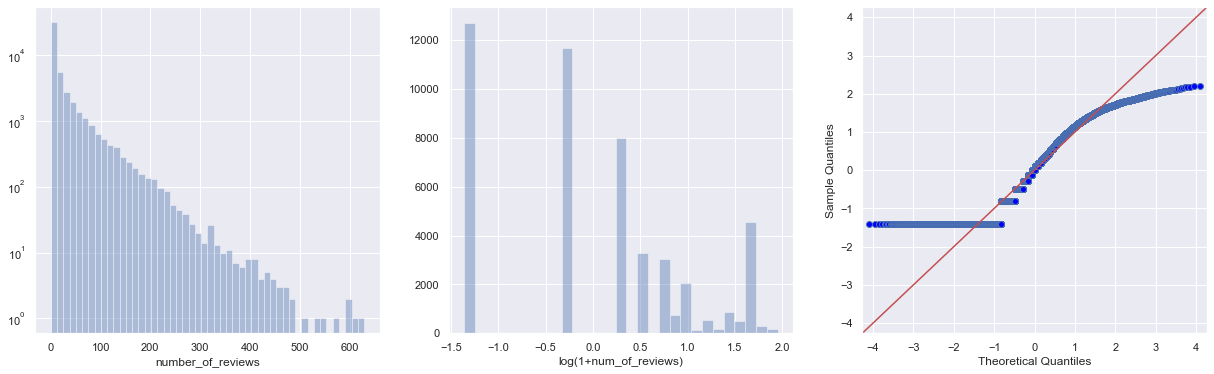

In [256]:
import matplotlib.pyplot as plt
import seaborn as sns


log_number_of_reviews = df_model['number_of_reviews']

fig, axes = plt.subplots(1,3, figsize=(21,6))
sns.distplot(df['number_of_reviews'], kde=False, ax=axes[0])
axes[0].set_yscale('log')
sns.distplot(log_minimum_nights, kde=False, ax=axes[1])
axes[1].set_xlabel('log(1+num_of_reviews)')
sm.qqplot(log_number_of_reviews, stats.norm, fit=True, line='45', ax=axes[2]);

                   number_of_reviews     price
number_of_reviews           1.000000 -0.047954
price                      -0.047954  1.000000


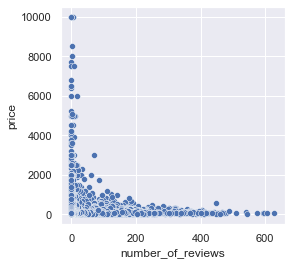

In [178]:
# 리뷰수 & 가격
plt.figure(figsize=(4,4))
sns.scatterplot(x= df['number_of_reviews'], y=df['price'])

print(df[['number_of_reviews', 'price']].corr())

<b>Last_review</b>

* 

<b>Reviews_per_month</b>

* 

Text(0.5, 0, 'ln(reviews_per_month)')

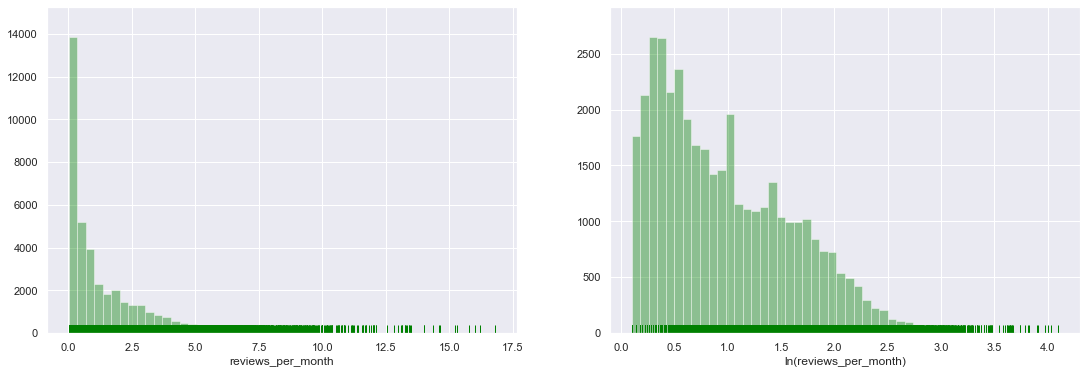

In [259]:

fig, axes = plt.subplots(1,2,figsize=(18.5, 6))
sns.distplot(df[df['reviews_per_month'] < 17.5]['reviews_per_month'], rug=True, kde=False, color="green", ax=axes[0])
sns.distplot(np.sqrt(df[df['reviews_per_month'] < 17.5]['reviews_per_month']), rug=True, kde=False, color="green", ax=axes[1])
axes[1].set_xlabel('ln(reviews_per_month)')

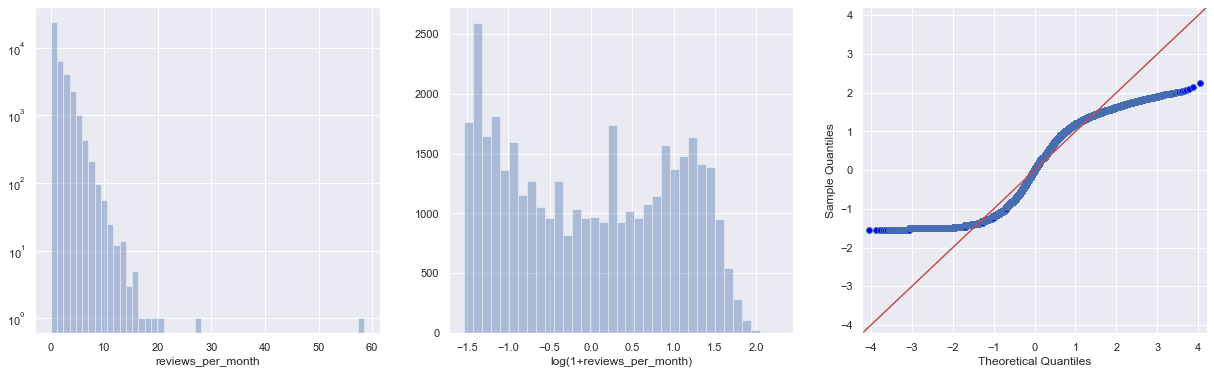

In [260]:
import matplotlib.pyplot as plt
import seaborn as sns


log_reviews_per_month = df_model[df_model['reviews_per_month']<3]['reviews_per_month']

fig, axes = plt.subplots(1,3, figsize=(21,6))
sns.distplot(df['reviews_per_month'], kde=False, ax=axes[0])
axes[0].set_yscale('log')
sns.distplot(log_reviews_per_month, kde=False, ax=axes[1])
axes[1].set_xlabel('log(1+reviews_per_month)')
sm.qqplot(log_reviews_per_month, stats.norm, fit=True, line='45', ax=axes[2]);

<AxesSubplot:xlabel='reviews_per_month'>

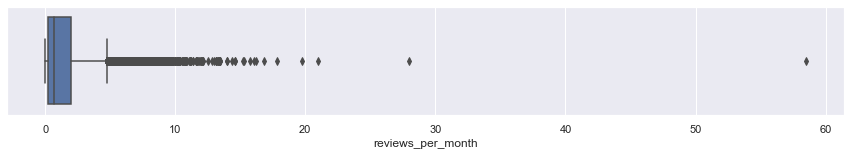

In [261]:
plt.figure(figsize = (15, 2))
sns.set_theme(style="darkgrid")
sns.boxplot(df_model['reviews_per_month'])

                   reviews_per_month     price
reviews_per_month           1.000000 -0.030608
price                      -0.030608  1.000000


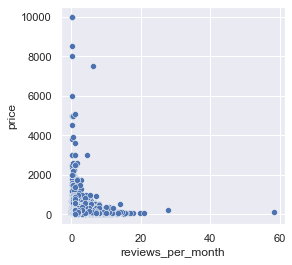

In [179]:
# 한달 평균 리뷰수 & 가격
plt.figure(figsize=(4,4))
sns.scatterplot(x= df['reviews_per_month'], y=df['price'])

print(df[['reviews_per_month', 'price']].corr())

In [281]:
# 이상치 평균으로 대체 (후 남는 Na 값 평균으로 대치)

df_model_enc['reviews_per_month'] \
= df_model_enc[df_model_enc['reviews_per_month'] < 17.5]['reviews_per_month']

df_model_enc['reviews_per_month'].fillna(df_model_enc['reviews_per_month'].mean(), inplace = True)

df_model_enc.isna().sum()

latitude                             0
longitude                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
neighbourhood_group_Bronx            0
neighbourhood_group_Brooklyn         0
neighbourhood_group_Manhattan        0
neighbourhood_group_Queens           0
neighbourhood_group_Staten Island    0
room_type_Entire home/apt            0
room_type_Private room               0
room_type_Shared room                0
dtype: int64

<b>Calculated_host_listings_count</b>

* 

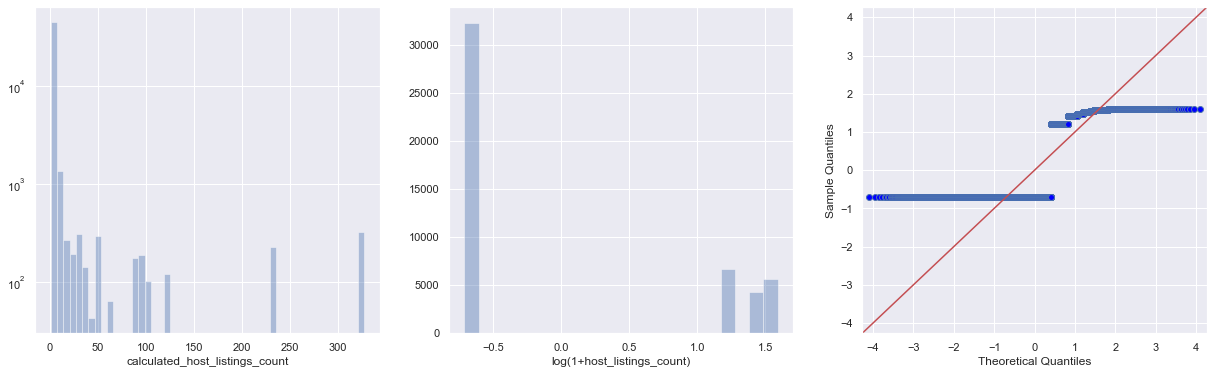

In [267]:
import matplotlib.pyplot as plt
import seaborn as sns

log_host_listings_count = df_model['calculated_host_listings_count']

fig, axes = plt.subplots(1,3, figsize=(21,6))
sns.distplot(df['calculated_host_listings_count'], kde=False, ax=axes[0])
axes[0].set_yscale('log')
sns.distplot(log_host_listings_count, kde=False, ax=axes[1])
axes[1].set_xlabel('log(1+host_listings_count)')
sm.qqplot(log_host_listings_count, stats.norm, fit=True, line='45', ax=axes[2]);

In [271]:
df['calculated_host_listings_count'].max()

327

<b>Availability_365</b>

* 

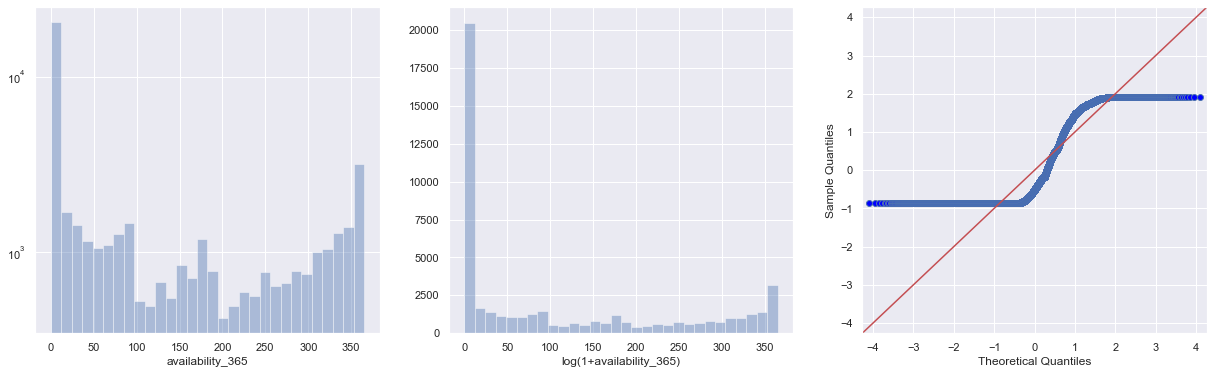

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns

log_host_listings_count = df_model['availability_365']

fig, axes = plt.subplots(1,3, figsize=(21,6))
sns.distplot(df['availability_365'], kde=False, ax=axes[0])
axes[0].set_yscale('log')
sns.distplot(log_host_listings_count, kde=False, ax=axes[1])
axes[1].set_xlabel('log(1+availability_365)')
sm.qqplot(log_host_listings_count, stats.norm, fit=True, line='45', ax=axes[2]);

                  availability_365     price
availability_365          1.000000  0.081829
price                     0.081829  1.000000


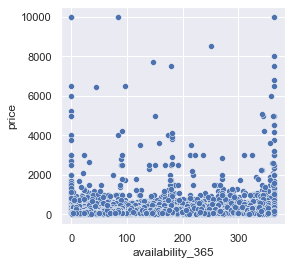

In [182]:
# 숙박 가능일 & 가격
plt.figure(figsize=(4,4))
sns.scatterplot(x= df['availability_365'], y=df['price'])

print(df[['availability_365', 'price']].corr())

## 불필요한 변수 제거

* 2차로 불필요한 변수 제거
* 최종적으로 10개 변수를 선별.

In [36]:
df_model = df_model.drop(columns = ['id', 'host_id', 'neighbourhood'])

In [37]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   latitude                        48895 non-null  float64
 2   longitude                       48895 non-null  float64
 3   room_type                       48895 non-null  object 
 4   price                           48895 non-null  float64
 5   minimum_nights                  48895 non-null  float64
 6   number_of_reviews               48895 non-null  float64
 7   reviews_per_month               48895 non-null  float64
 8   calculated_host_listings_count  48895 non-null  float64
 9   availability_365                48895 non-null  float64
dtypes: float64(8), object(2)
memory usage: 3.7+ MB


## 레이블 인코딩 & 원-핫 인코딩

* Categorical variable을 numerical variable로 변환해야 한다.
* 'neighboorhood_group'과 'room_type' 레벨이 두 개 이상임으로 원-핫 인코딩을 해야 한다.

<b>Categorical 변수만 추출하여 원-핫 인코딩</b>

In [38]:
# 원-핫 인코딩
categorical_cols = ['neighbourhood_group', 'room_type']
categorical_features = pd.get_dummies(df_model[categorical_cols])
categorical_features.head()

,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,0,1,0,0,0,0,1,0
1,0,0,1,0,0,1,0,0
2,0,0,1,0,0,0,1,0
3,0,1,0,0,0,1,0,0
4,0,0,1,0,0,1,0,0


<b>본 데이터프레임과 합치기</b>

In [39]:
# 합치기
df_model_enc = df_model.drop(columns = categorical_cols)
df_model_enc = pd.concat([df_model_enc, categorical_features], axis = 1)
df_model_enc.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,-1.431880,-0.429598,0.449370,-1.288079,0.304821,-1.095649,1.806522,1.247981,0,1,0,0,0,0,1,0
1,0.520684,-0.690799,1.002443,-1.288079,1.166039,-0.761861,0.757965,1.233499,0,0,1,0,0,1,0,0
2,1.431880,0.252825,0.458642,0.173429,-1.382666,0.407098,-0.682293,1.247981,0,0,1,0,0,0,1,0
3,-0.781025,-0.144427,-0.295251,-1.288079,1.967139,1.731684,-0.682293,0.926989,0,1,0,0,0,1,0,0
4,1.301709,0.206736,-0.456925,1.273193,0.304821,-1.351556,-0.682293,-1.189744,0,0,1,0,0,1,0,0


## 변수 간 관계 파악

<b>변수 상관 관계를 시각화 1: Heatmap</b>

Text(0.5, 1.0, 'CorrelationMatrix')

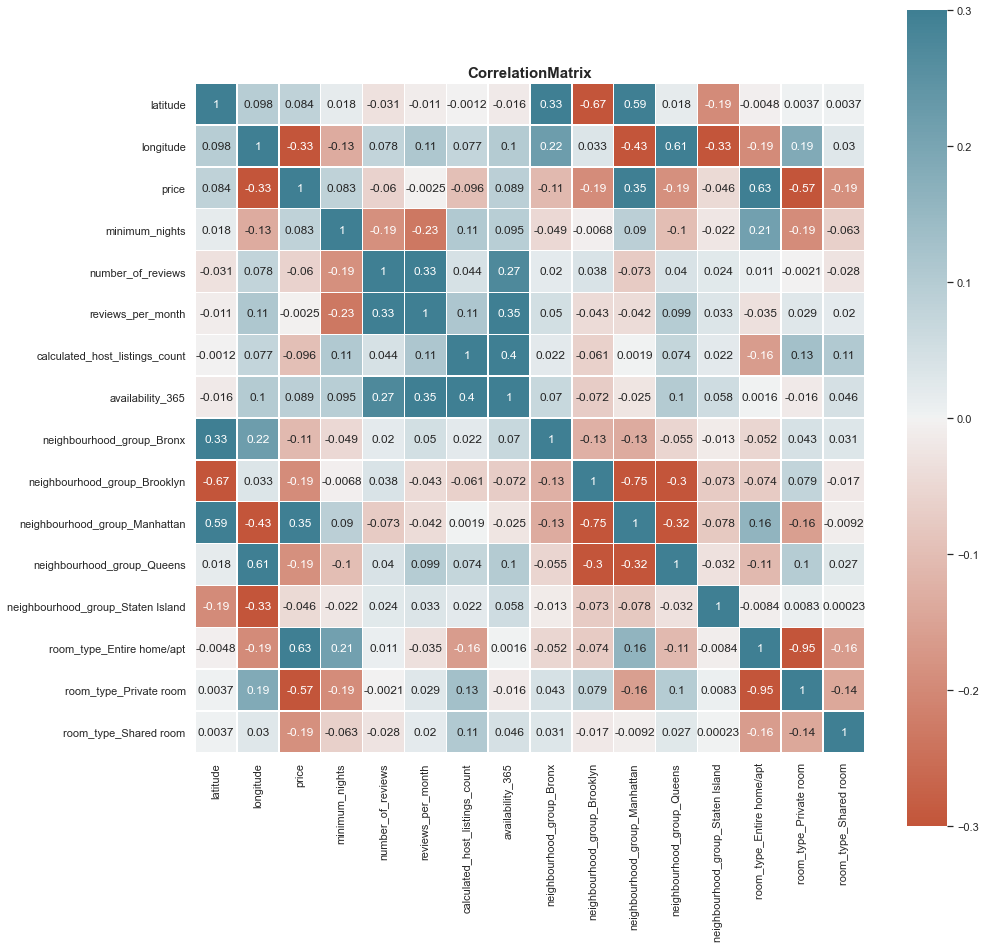

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df_model_enc.corr(method = 'pearson')

plt.figure(figsize = (15, 15))
palette = sns.diverging_palette(20, 220, n=256)
sns.heatmap(corr, annot = True, vmin = -.3, vmax = .3, cmap = palette, square = True, linewidths = 0.5)
plt.title("CorrelationMatrix", size = 15, weight = 'bold')

<b>변수 상관 관계를 시각화 1: Pairplot</b>

<Figure size 1080x1080 with 0 Axes>

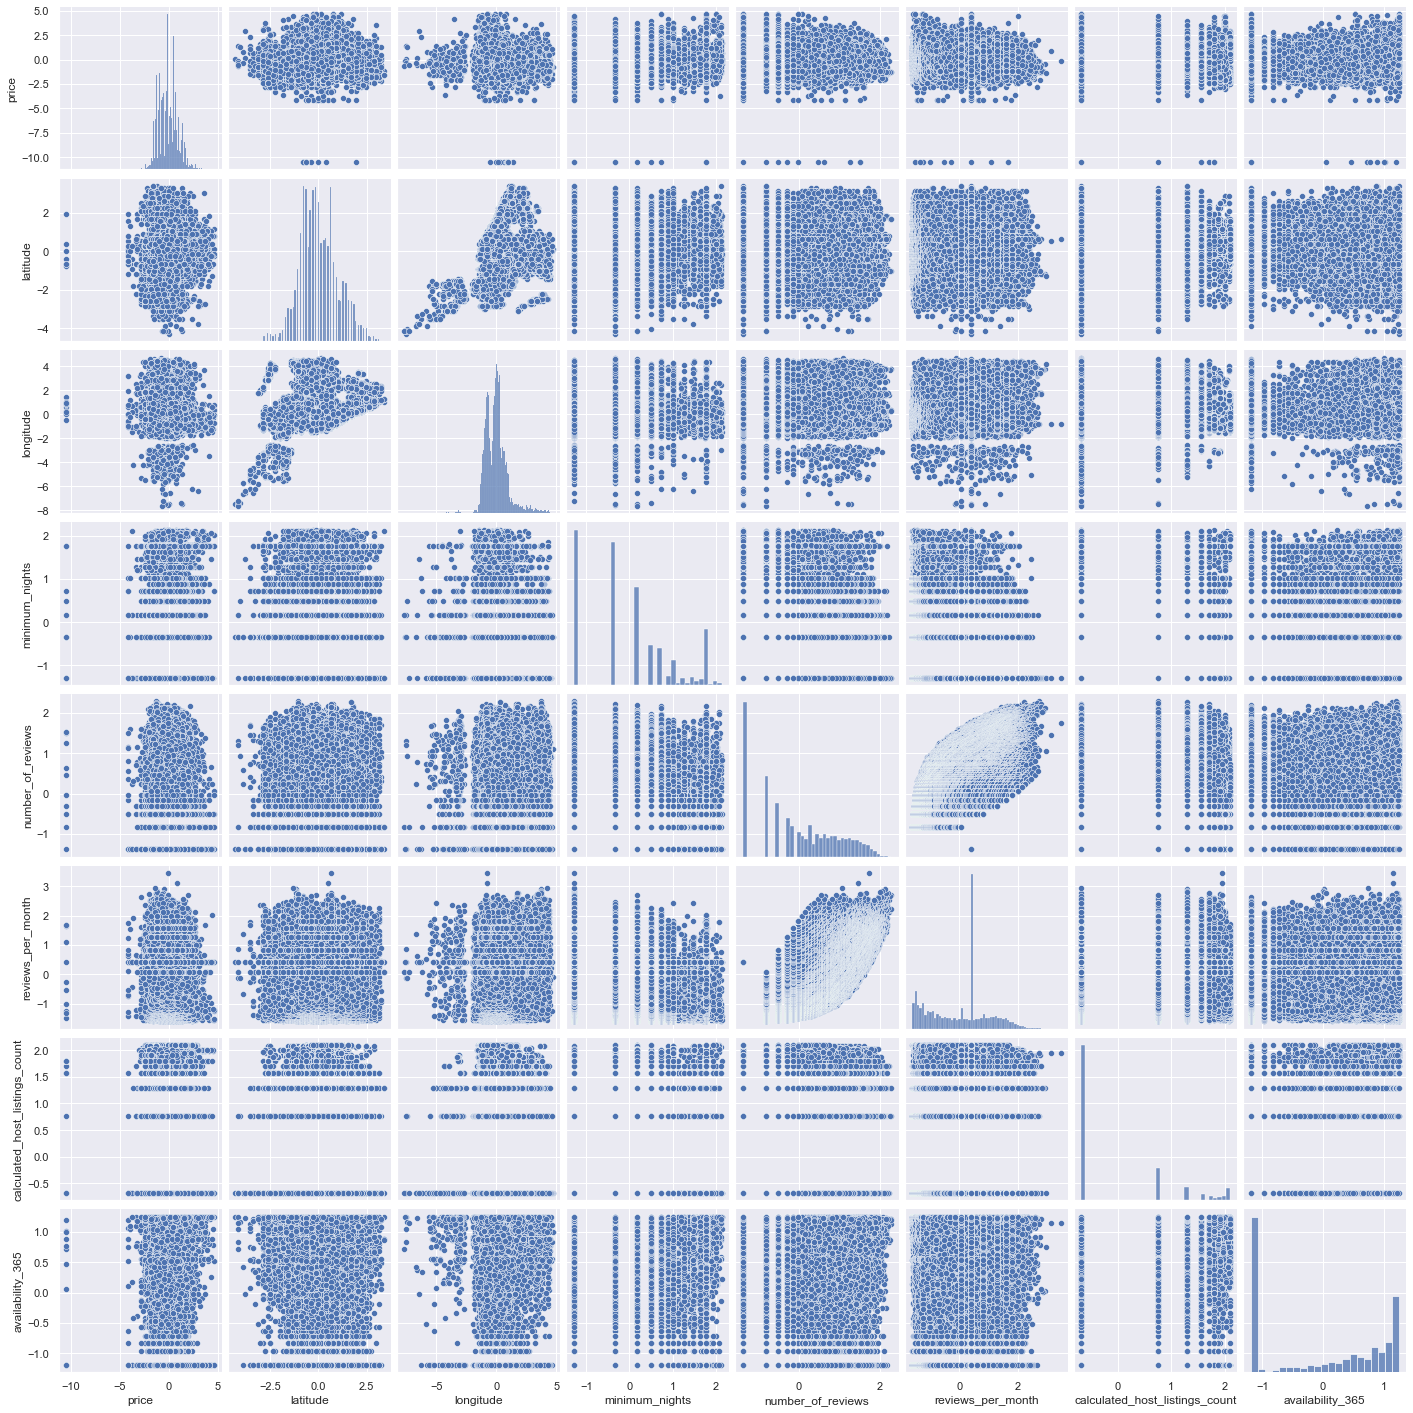

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['price', 'latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

plt.figure(figsize = (15, 15))
sns.pairplot(df_model_enc.loc[:, numerical_cols])

# 03. 훈련/테스트 데이터 분리

* Train 70%, Test 30%
* Random_state = 2021

<b>독립변수 종속변수 나누기</b>

In [51]:
x = df_model_enc.drop(columns=['price'], axis = 1)
y = df_model_enc[['price']]
print(x.shape, y.shape)

(48895, 15) (48895, 1)


<b>Train-test split</b>

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.3, random_state = 2021)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape )

(34226, 15) (14669, 15) (34226, 1) (14669, 1)


## 피쳐 스케일링과 정규화

주의사항
* 위에서 PowerTransform 하였을 경우, 정규화를 생략한다.
* numerical 변수에만 적용하여야 한다

두 가지 방법 중에 택 1
* 방법 1: Normalization (MinMaxScaler)
* 방법 2: Standardization (StandardScaler) --- numerical 변수만 선택하여야함.


<b>방법 1: Normalization (MinMaxScaler)</b>

In [46]:
# MinMaxScaler

# from sklearn.preprocessing import MinMaxScaler

# numerical_cols = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

# mmsc_x = MinMaxScaler()
# mmsc_x.fit_transform(x_train.loc[:, numerical_cols])
# x_train.loc[:, numerical_cols] = mmsc_x.transform(x_train.loc[:, numerical_cols])
# x_test.loc[:, numerical_cols] = mmsc_x.transform(x_test.loc[:, numerical_cols])

# x_train = pd.DataFrame(x_train, columns = x.columns)
# x_test = pd.DataFrame(x_test, columns = x.columns)

# x_train.head()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
15543,0.576271,0.622509,0.520536,0.337988,0.047635,0.000000,0.000000,0,1,0,0,0,1,0,0
45818,0.559322,0.572008,0.520536,0.000000,0.397215,0.000000,0.956250,0,0,1,0,0,1,0,0
31109,0.423729,0.845446,0.000000,0.790420,0.708892,0.000000,0.717944,0,0,0,1,0,0,1,0
3009,0.491525,0.653266,0.426224,0.816120,0.431940,0.518047,0.000000,0,1,0,0,0,0,1,0
27049,0.457627,0.687609,0.426224,0.621406,0.402941,0.712880,0.985480,0,1,0,0,0,1,0,0


<b>방법 2: StandardScaler</b>

In [48]:
# # 방법 2: Standardization (StandardScaler)

# from sklearn.preprocessing import StandardScaler

# numerical_cols = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

# sc_x = StandardScaler()
# sc_x.fit_transform(x_train.loc[:, numerical_cols])
# x_train.loc[:, numerical_cols] = sc_x.transform(x_train.loc[:, numerical_cols])
# x_test.loc[:, numerical_cols] = sc_x.transform(x_test.loc[:, numerical_cols])

# x_train = pd.DataFrame(x_train, columns = x.columns)
# x_test = pd.DataFrame(x_test, columns = x.columns)

# x_train.head()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
15543,0.094541,0.008371,0.493869,-0.145696,-1.348435,-0.685568,-1.191279,0,1,0,0,0,1,0,0
45818,-0.035618,-0.611782,0.493869,-1.379141,0.410499,-0.685568,1.141447,0,0,1,0,0,1,0,0
31109,-1.076897,2.746020,-1.284616,1.505401,1.978721,-0.685568,0.560111,0,0,0,1,0,0,1,0
3009,-0.556258,0.386061,0.171636,1.599187,0.585223,0.750791,-1.191279,0,1,0,0,0,0,1,0
27049,-0.816577,0.807792,0.171636,0.888605,0.439312,1.290992,1.212753,0,1,0,0,0,1,0,0


# 04. 모델 학습

다음 9가지 머신러닝 예측 알고리즘을 이용하여 데이터를 학습시킨다.

Linear Models

* Simple Linear Regression 
* Multiple Linear Regression
* Ridge Regression
* Lasso Regression
* ElasticNet Regression

Tree Models

* Decision Tree
* Random Forest
* Gradient Boosting Regressor

SVM

* SVM Regression (rbf, linear, poly)

<b>모델 훈련</b>

In [53]:
# Simple Linear Regression

from sklearn.linear_model import LinearRegression

simlr = LinearRegression()
simlr.fit(x_train['longitude'].values.reshape((-1, 1)), y_train)

# Multiple Linear Regression

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

# Ridge Model

from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 0.01, normalize = True)
ridge.fit(x_train, y_train)    

# Lasso Model

from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.001, normalize =False)
lasso.fit(x_train, y_train)

# ElasticNet Model

from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha = 0.01, normalize=False)
enet.fit(x_train, y_train) 

# Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train, y_train) 

# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train, y_train) 

# Gradient Boosting Regressor

from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train) 

# SVM Regression

from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_rbf.fit(x_train, y_train)

svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_lin.fit(x_train, y_train)

svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)
svr_poly.fit(x_train, y_train)


SVR(C=100, coef0=1, gamma='auto', kernel='poly')

# 05. 예측 수행

<b>학습한 모델들에 테스트 데이터셋(x_test)을 넣어 가격을 예측</b>

In [54]:
# 예측 

## Simple Linear Regression

pred_simlr = simlr.predict(x_test['longitude'].values.reshape((-1, 1)))

print('Simple Linear Regression_Longitude')
print('prediction : {}'.format(pred_simlr))
print('-' * 45)

## 나머지

models = {
    'Multiple Linear Regression': lr, 
    'Ridge' : ridge, 
    'Lasso' : lasso, 
    'Elastic Net' : enet,
    'Decision Tree' : dt,
    'Random Forest' : rf, 
    'Gradient Boost Regressor' : gbr,
    'SVR_rbf' : svr_rbf,
    'SVR_linear' : svr_lin,
    'SVR_poly' : svr_poly
    }

for model_name, model in models.items():
    
    pred = model.predict(x_test)

    print(model_name)
    print('prediction : {}'.format(pred))
    print('-' * 45)


Simple Linear Regression_Longitude
prediction : [[ 0.2507583 ]
 [-0.06674319]
 [-0.09285047]
 ...
 [-0.04862063]
 [-0.00602122]
 [ 0.02532495]]
---------------------------------------------
Multiple Linear Regression
prediction : [[ 1.00219727]
 [ 0.37561035]
 [ 0.36096191]
 ...
 [ 0.82202148]
 [-0.95715332]
 [-0.85070801]]
---------------------------------------------
Ridge
prediction : [[ 0.99703727]
 [ 0.37294601]
 [ 0.35824599]
 ...
 [ 0.82032889]
 [-0.95087618]
 [-0.84514817]]
---------------------------------------------
Lasso
prediction : [ 0.99653395  0.37567602  0.35961788 ...  0.82437084 -0.95430014
 -0.85047314]
---------------------------------------------
Elastic Net
prediction : [ 0.95205471  0.37089828  0.3620228  ...  0.81342212 -0.91858672
 -0.83305374]
---------------------------------------------
Decision Tree
prediction : [ 2.3448667   0.20235176 -0.45692529 ...  0.24716207 -0.7794665
 -1.01725489]
---------------------------------------------
Random Forest
predicti

<b>예측가격 vs 실제가격 비교 시각화</b>

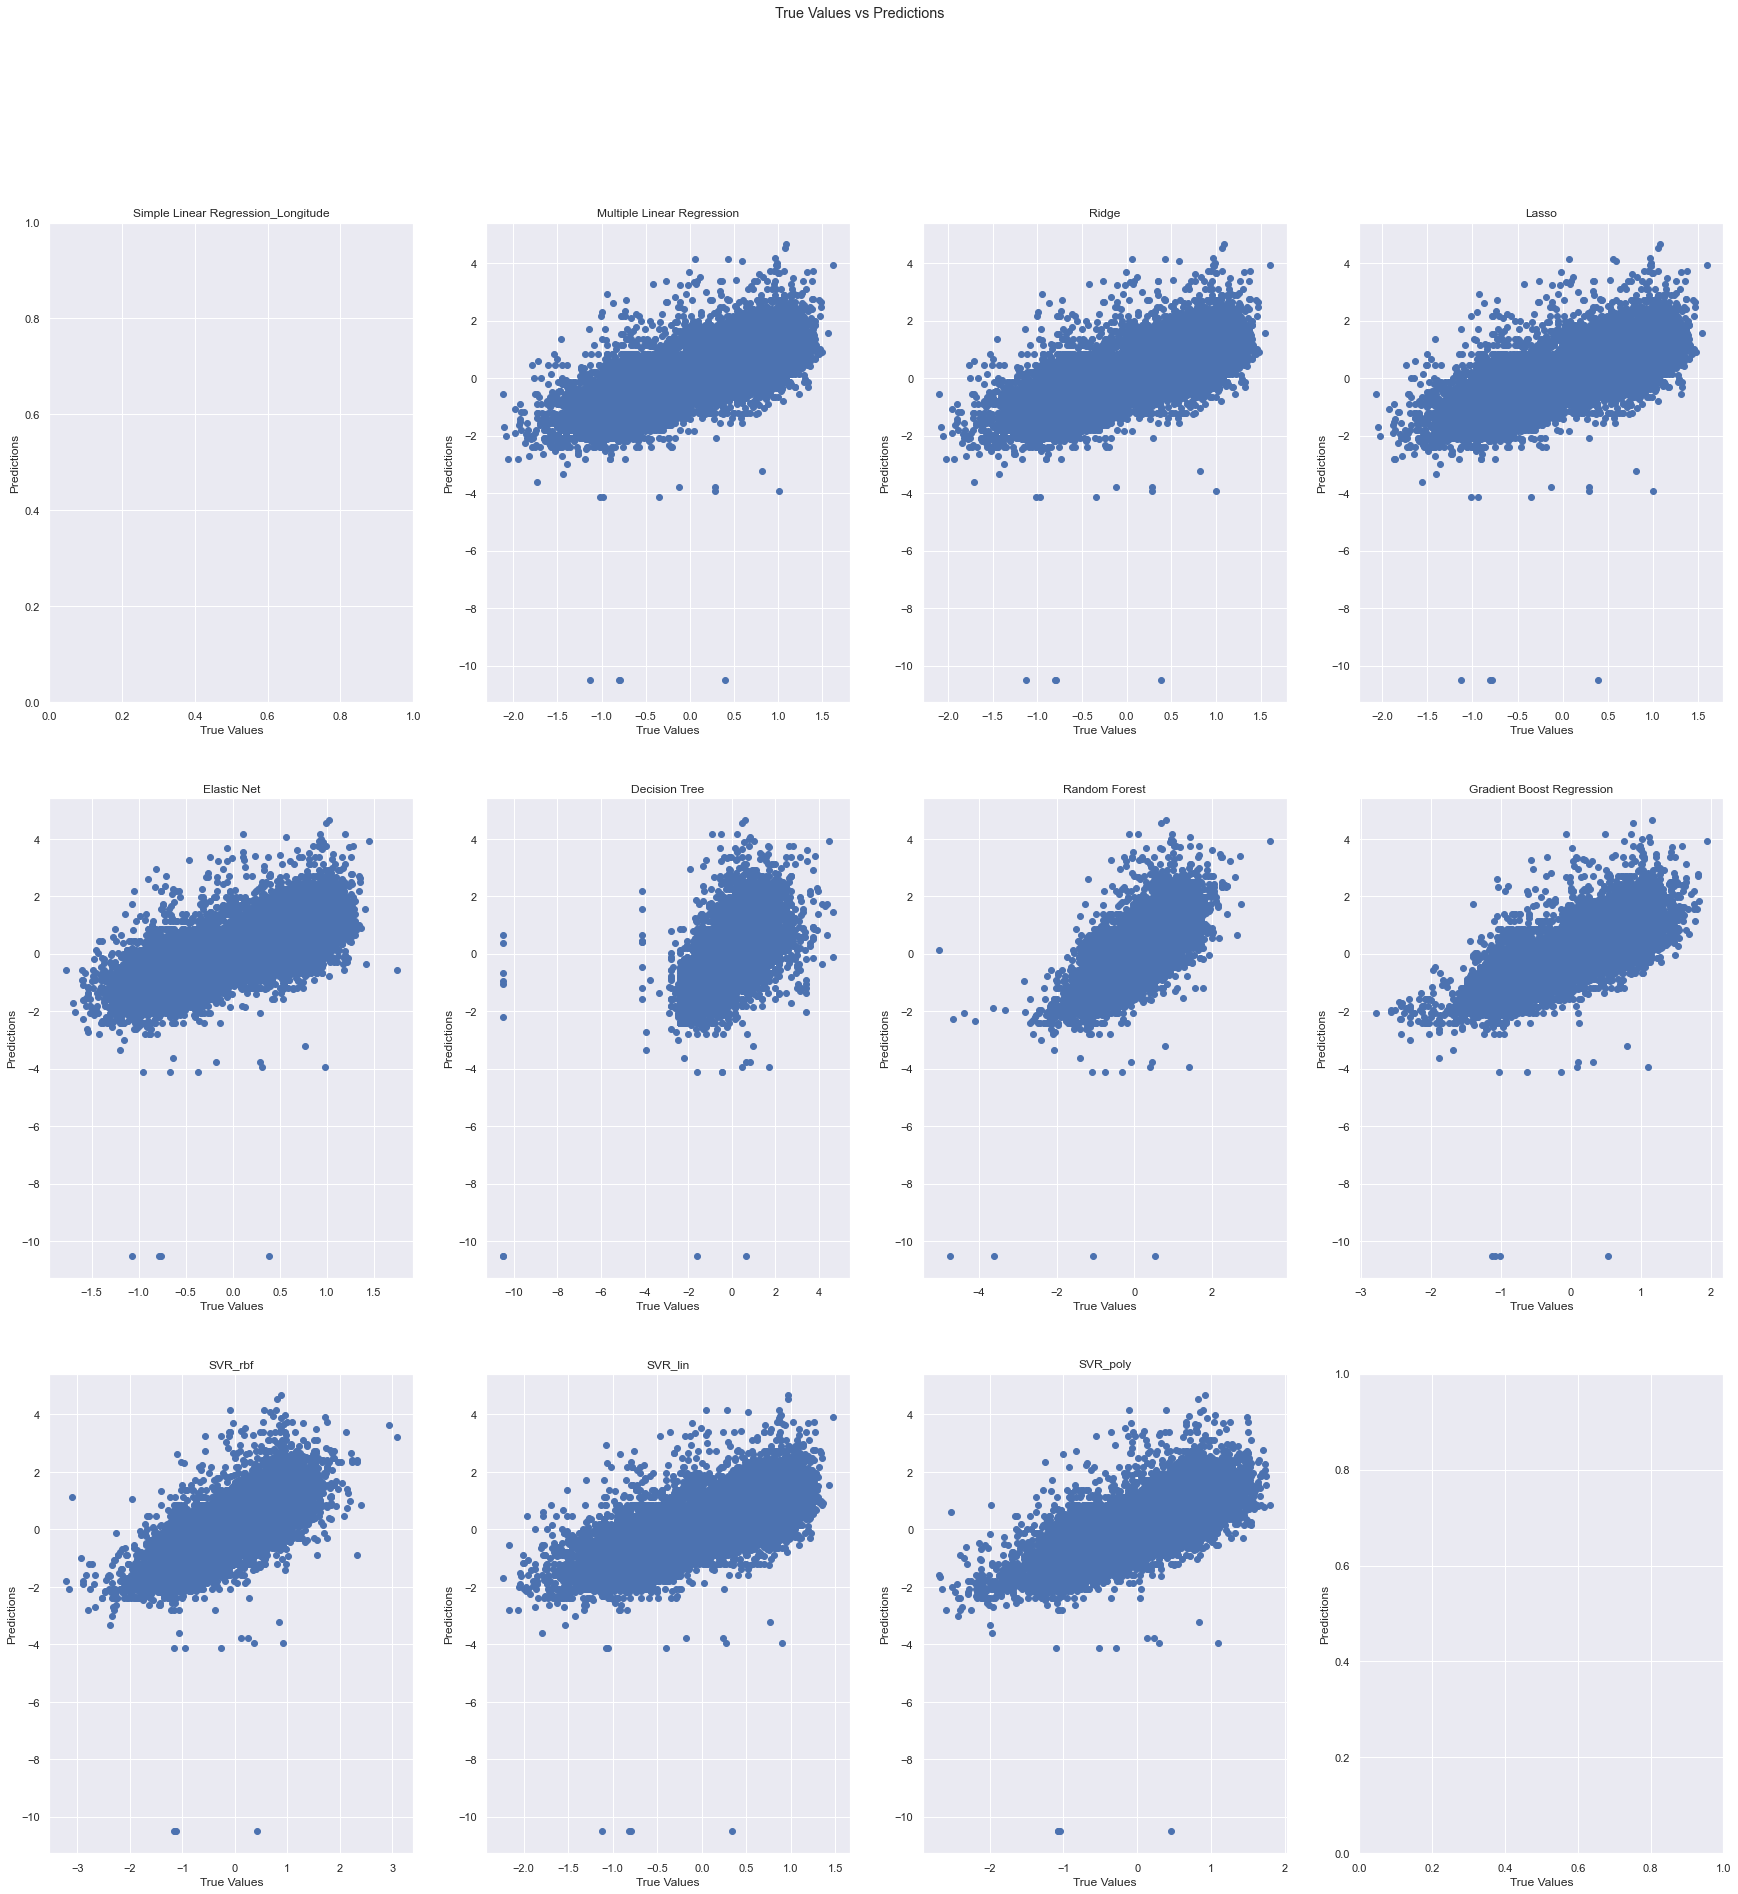

In [228]:
# 시각화

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 4, figsize=(30, 30))
fig.suptitle('True Values vs Predictions')

axes[0,0].set_title('Simple Linear Regression_Longitude')
#axes[0,0] = plt.scatter(x = simlr.predict(x_test), y = y_test.values)

axes[0,1].set_title('Multiple Linear Regression')
axes[0,1].scatter(x = lr.predict(x_test), y = y_test.values)

axes[0,2].set_title('Ridge')
axes[0,2].scatter(x = ridge.predict(x_test), y = y_test.values)

axes[0,3].set_title('Lasso')
axes[0,3].scatter(x = lasso.predict(x_test), y = y_test.values)

axes[1,0].set_title('Elastic Net')
axes[1,0].scatter(x = enet.predict(x_test), y = y_test.values)

axes[1,1].set_title('Decision Tree')
axes[1,1].scatter(x = dt.predict(x_test), y = y_test.values)

axes[1,2].set_title('Random Forest')
axes[1,2].scatter(x = rf.predict(x_test), y = y_test.values)

axes[1,3].set_title('Gradient Boost Regression')
axes[1,3].scatter(x = gbr.predict(x_test), y = y_test.values)

axes[2,0].set_title('SVR_rbf')
axes[2,0].scatter(x = svr_rbf.predict(x_test), y = y_test.values)

axes[2,1].set_title('SVR_lin')
axes[2,1].scatter(x = svr_lin.predict(x_test), y = y_test.values)

axes[2,2].set_title('SVR_poly')
axes[2,2].scatter(x = svr_poly.predict(x_test), y = y_test.values)

for ax in fig.get_axes():
    ax.set(xlabel='True Values', ylabel='Predictions')

<b>Linear 모델들 회귀식 출력</b>

In [50]:
## Simple Linear Regression

pred_simlr = simlr.predict(x_test['longitude'].values.reshape((-1, 1)))

print('Simple Linear Regression_Longitude')
print('기울기 :', simlr.coef_)
print(' y절편 :', simlr.intercept_)
print('-' * 45)

## 나머지

models = {
    'Multiple Linear Regression': lr, 
    'Ridge' : ridge, 
    'Lasso' : lasso, 
    'Elastic Net' : enet,
    'Decision Tree' : dt,
    'Random Forest' : rf, 
    'Gradient Boost Regressor' : gbr,
    'SVR_rbf' : svr_rbf,
    'SVR_linear' : svr_lin,
    'SVR_poly' : svr_poly
    }

for model_name, model in models.items():
    
    print(model_name)
    print('기울기 :', model.coef_)
    print(' y절편 :', model.intercept_)
    print('-' * 45)


Simple Linear Regression_Longitude
기울기 : [[-0.32087377]]
 y절편 : [-5.42232439e-05]
---------------------------------------------
Multiple Linear Regression
기울기 : [[ 2.31841912e-02 -2.42538683e-01 -1.14881144e-01 -9.88404498e-02
   1.03997176e-03 -2.35040867e-02  1.70829327e-01  1.96216788e+09
   1.96216788e+09  1.96216788e+09  1.96216788e+09  1.96216788e+09
   4.99168332e+11  4.99168332e+11  4.99168332e+11]]
 y절편 : [-5.01130499e+11]
---------------------------------------------
Ridge
기울기 : [[ 0.0212473  -0.23563645 -0.11176978 -0.09702254  0.00172257 -0.02364665
   0.16759469 -0.29251177 -0.11010643  0.19263872 -0.01967655 -1.62703664
   0.60961729 -0.50267374 -1.16865517]]
 y절편 : [-0.07448822]
---------------------------------------------
Lasso
기울기 : [ 1.78880250e-02 -2.26776054e-01 -1.11674209e-01 -9.68865437e-02
  2.78219304e-05 -2.31176925e-02  1.67021820e-01 -1.40001433e-01
 -0.00000000e+00  3.11288357e-01  7.28381089e-02 -1.36548296e+00
  1.11783411e+00  0.00000000e+00 -6.33542727

# 06. 모델 평가 & 비교

각 모델의 예측성능을 R^2, RMSE를 출력하여 평가.
* RMSE
* R^2

<b>각 모델의 RMSE & R^2 출력</b>

훈련세트(x_test)와 테스트세트(y_test)에 대한 예측 성능을 비교해본다.

In [76]:
# 모델 평가 (R^2, RMSE)

from sklearn.metrics import mean_squared_error, r2_score


## Simple Linear Regression

pred_simlr_train = simlr.predict(x_train['longitude'].values.reshape((-1, 1)))
pred_simlr = simlr.predict(x_test['longitude'].values.reshape((-1, 1))) 

mse_train = mean_squared_error(y_train, pred_simlr_train)
rmse_train = np.sqrt(mse_train) # RMSE train
    
mse = mean_squared_error(y_test, pred_simlr)
rmse = np.sqrt(mse) # RMSE test

print('Simple Linear Regression_Longitude')
print('*---- TRAIN ----*')
print('MSE : {0: .3f}, RMSE : {1: .3f}'.format(mse_train, rmse_train))
print('R2 : {: .4f}'.format(r2_score(y_train, pred_simlr_train)))
print('*---- TEST ----*')
print('MSE : {0: .3f}, RMSE : {1: .3f}'.format(mse, rmse))
print('R2 : {: .4f}'.format(r2_score(y_test, pred_simlr)))
print('-' * 45)


## 나머지

models = {
    'Multiple Linear Regression': lr, 
    'Ridge' : ridge, 
    'Lasso' : lasso, 
    'Elastic Net' : enet,
    'Decision Tree Regressor' : dt,
    'Random Forest Regressor' : rf,
    'Gradient Boosting Regressor' : gbr,
    'SVM Regression_rbf' : svr_rbf,
    'SVM Regression_linear' : svr_lin,
    'SVM Regression_poly' : svr_poly,
    }


for model_name, model in models.items():
    
    pred_train = model.predict(x_train)
    pred = model.predict(x_test)
    
    mse_train = mean_squared_error(y_train, pred_train)
    rmse_train = np.sqrt(mse_train) # RMSE train
    
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse) # RMSE test
    
    print(model_name)
    print('*---- TRAIN ----*')
    print('MSE : {0: .3f}, RMSE : {1: .3f}'.format(mse_train, rmse_train))
    print('R2 : {: .4f}'.format(r2_score(y_train, pred_train)))
    print('*---- TEST ----*')
    print('MSE : {0: .3f}, RMSE : {1: .3f}'.format(mse, rmse))
    print('R2 : {: .4f}'.format(r2_score(y_test, pred)))
    print('-' * 45)


Simple Linear Regression_Longitude
*---- TRAIN ----*
MSE :  0.892, RMSE :  0.945
R2 :  0.1100
*---- TEST ----*
MSE :  0.883, RMSE :  0.940
R2 :  0.1119
---------------------------------------------
Multiple Linear Regression
*---- TRAIN ----*
MSE :  0.484, RMSE :  0.696
R2 :  0.5171
*---- TEST ----*
MSE :  0.466, RMSE :  0.683
R2 :  0.5314
---------------------------------------------
Ridge
*---- TRAIN ----*
MSE :  0.484, RMSE :  0.696
R2 :  0.5170
*---- TEST ----*
MSE :  0.466, RMSE :  0.683
R2 :  0.5313
---------------------------------------------
Lasso
*---- TRAIN ----*
MSE :  0.484, RMSE :  0.696
R2 :  0.5168
*---- TEST ----*
MSE :  0.466, RMSE :  0.683
R2 :  0.5311
---------------------------------------------
Elastic Net
*---- TRAIN ----*
MSE :  0.494, RMSE :  0.703
R2 :  0.5067
*---- TEST ----*
MSE :  0.477, RMSE :  0.690
R2 :  0.5207
---------------------------------------------
Decision Tree Regressor
*---- TRAIN ----*
MSE :  0.000, RMSE :  0.005
R2 :  1.0000
*---- TEST ----*

<b>평가 결과</b>

Random Forest Regressor
* 훈련세트: 0.9438
* 테스트세트: 0.6052

SVM Regression_rbf
* 훈련세트: 0.6484
* 테스트세트: 0.5902


R2로 예측성능을 비교했을때 Random Forest Regressor & SVM Regression_linear이 가장 예측력이 좋은 것으로 나타났다. 하지만 Random Forest Regressor은 훈련세트보다 테스트세트 예측력이 훨씬 낮은 것을 보아 overfitting 문제가 있고 SVM Regression_rbf 또한 모델 개선의 여지가 있어 보인다.

# 07. 모델 개선 및 최종 모델 선정

다음 방법을 이용하여 가장 성능이 좋았던 Random Forest와 SVM_rgf를 중심으로 모델을 개선해보자.

1. 피쳐 엔지니어링, 선택, 가공
2. 하이퍼파라미터 튜닝

## 피쳐 엔지니어링, 선택, 가공

* Feature selection
* PCA
* Polynomial transformation
등

<b>훈련된 Random Forest 모델 feature importance 출력하여 예측에 중요하게 고려된 주요 변수를 살펴본다</b>



<AxesSubplot:>

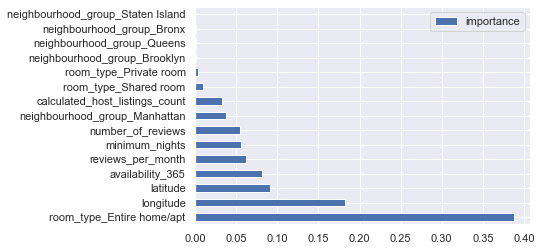

In [108]:
pd.DataFrame(rf.feature_importances_, index = x.columns, columns=['importance']).sort_values(by='importance', ascending=False).plot(kind = 'barh')

## 하이퍼 파라미터 튜닝

* Grid search 를 이용하여 두 모델의 하이퍼 파라미터를 튜닝한다.

<b>Grid Search 함수</b>

In [120]:
# Grid Search Functions

from sklearn.model_selection import GridSearchCV


### Random Forest Regression ###

def rf_reg(input_x, input_y, cv=5):
    
    ## Model
    model_grid_rf= RandomForestRegressor()

    # Defining Parameters
    param_grid = {
        'max_depth': [80, 90, 100, 110],
        'max_features': [2, 3],
        'min_samples_leaf': [3, 4, 5],
        'min_samples_split': [8, 10, 12],
        'n_estimators': [100, 200, 300, 1000]
    }

    ## Building Grid Search algorithm with cross-validation and R2 score.

    grid_search_rf = GridSearchCV(estimator=model_grid_rf,  
                         param_grid=param_grid,
                         scoring='r2',
                         cv=cv,
                         n_jobs=-1)

    ## Lastly, finding the best parameters.

    grid_search_rf.fit(input_x, input_y)
    best_parameters_rf = grid_search_rf.best_params_  
    best_score_rf = grid_search_rf.best_score_ 
    print(best_parameters_rf)
    print(best_score_rf)
    return best_parameters_rf, best_score_rf



### SVM Regression ###

def svm_reg(input_x, input_y, cv=5):
    
    ## Model
    model_grid_svr= SVR()

    # Defining Parameters
    param_grid = {
        'kernel': ['rbf'],
        'C': [0.1, 1, 10, 100, 1000],
        'gamma': [1, 0.1, 0.01, 0.001],
    }
    


    ## Building Grid Search algorithm with cross-validation and R2 score.

    grid_search_svr = GridSearchCV(estimator=model_grid_svr,  
                         param_grid=param_grid,
                         scoring='r2',
                         cv=cv,
                         n_jobs=-1)

    ## Lastly, finding the best parameters.

    grid_search_svr.fit(input_x, input_y)
    best_parameters_svr = grid_search_svr.best_params_  
    best_score_svr = grid_search_svr.best_score_ 
    print(best_parameters_svr)
    print(best_score_svr)
    return best_parameters_svr, best_score_svr

<b>Grid Search 최적 하이퍼 파라미터 출력 -- Random Forest</b>

In [59]:
print('Grid Search: Best Parameters & Best Score')
print()

print('Random Forest Model:')
best_score_rf, best_parameters_rf = rf_reg(x_train, y_train)
print('-'*25)

Grid Search: Best Parameters & Best Score

Random Forest Model:
{'max_depth': 110, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 1000}
0.6106985386950015
-------------------------


<b>Grid Search로 최적 하이퍼 파라미터 출력-- SVR</b>

In [121]:
print('Grid Search: Best Parameters & Best Score')
print()

print('SVM:')
best_score_svr, best_parameters_svr = svm_reg(x_train, y_train)
print('-'*25)

Grid Search: Best Parameters & Best Score

SVM:
{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.5847670534536913
-------------------------


<b>수정된 하이퍼파라미터로 모델 재학습 -- Random Forest</b>

In [60]:
from sklearn.ensemble import RandomForestRegressor

rf_opt = RandomForestRegressor(max_depth = 110, max_features = 3, min_samples_leaf = 3, min_samples_split = 8, n_estimators = 1000)
rf_opt.fit(x_train, y_train) 


RandomForestRegressor(max_depth=110, max_features=3, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=1000)

<b>수정된 하이퍼파라미터로 모델 재학습 -- SVR</b>

In [123]:
from sklearn.svm import SVR

svr_opt = SVR(kernel='rbf', C=1, gamma=0.1)
svr_opt.fit(x_train, y_train)

SVR(C=1, gamma=0.1)

## 최종 모델 평가 & 선정

개선된 모델의 예측성능을 R2, RMSE를 출력하여 평가해보자.

In [124]:
# 최종 예측 및 평가 (R^2, RMSE)

from sklearn.metrics import mean_squared_error, r2_score


## 나머지

models = {
    'Random Forest Regression': rf_opt, 
    'SVM Regressor' : svr_opt
    }


for model_name, model in models.items():
    
    pred_train = model.predict(x_train)
    pred = model.predict(x_test)
    
    mse_train = mean_squared_error(y_train, pred_train)
    rmse_train = np.sqrt(mse_train) # RMSE train
    
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse) # RMSE test
    
    print(model_name)
    print('*---- TRAIN ----*')
    print('MSE : {0: .3f}, RMSE : {1: .3f}'.format(mse_train, rmse_train))
    print('R2 : {: .4f}'.format(r2_score(y_train, pred_train)))
    print('*---- TEST ----*')
    print('MSE : {0: .3f}, RMSE : {1: .3f}'.format(mse, rmse))
    print('R2 : {: .4f}'.format(r2_score(y_test, pred)))
    print('-' * 45)



Random Forest Regression
*---- TRAIN ----*
MSE :  0.228, RMSE :  0.478
R2 :  0.7725
*---- TEST ----*
MSE :  0.372, RMSE :  0.610
R2 :  0.6263
---------------------------------------------
SVM Regressor
*---- TRAIN ----*
MSE :  0.398, RMSE :  0.631
R2 :  0.6026
*---- TEST ----*
MSE :  0.397, RMSE :  0.630
R2 :  0.6013
---------------------------------------------


<b>평가 결과</b>

Random Forest Regressor

* 훈련세트: 0.9438 ----> 0.7725
* 테스트세트: 0.6052 ----> 0.6263

SVM Regression_rbf

* 훈련세트: 0.6484 ----> 0.6026
* 테스트세트: 0.5902 ----> 0.6013


최종 모델은: Random Forest Regressor???